In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import skimage.io
import skimage.feature
import skimage.transform

import os
from glob import glob
import re

%matplotlib inline

In [2]:
## read the folders in a list
folder = os.listdir('data')
print(folder)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [3]:
#glob('./data/{}/*.jpg'.format('BearHead'))

all_path = []
for f in folder:
  all_path += glob('./data/{}/*.jpg'.format(f))

In [4]:
all_path

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [5]:
#reading image and label
img_all = skimage.io.ImageCollection(all_path)

In [6]:
len(img_all)

2063

In [7]:
img_all.files

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [8]:
 #labeling
# extract text folder
def extract_label(text):
  try:
      label = re.search(r'./data/(.*?)Head\\',text).group(1)
  except:
      label = re.search(r'./data/(.*?)\\',text).group(1)

    #label = str(label)  
  return label.lower()

In [9]:
labels = list(map(extract_label,img_all.files))

In [10]:
labels

['bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'c

In [11]:
len(labels)

2063

In [12]:
def buffer(io):
  return io

img_all_arrs = np.array(list(map(buffer,img_all)))
#img_all[2]

In [13]:
img_all_arrs.shape

(2063, 80, 80, 3)

In [14]:
data = dict()

data['description'] = 'There are 20 classes and 2057 images. All the images are 80 x 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [15]:
#save the file pickel
import pickle
import collections

In [16]:
data['labels']

{'bear',
 'cat',
 'chicken',
 'cow',
 'deer',
 'dog',
 'duck',
 'eagle',
 'elephant',
 'human',
 'lion',
 'monkey',
 'mouse',
 'natural',
 'panda',
 'pigeon',
 'rabbit',
 'sheep',
 'tiger',
 'wolf'}

In [19]:
pickle.dump(data,open('pickle files/data_animals_head_20.pickle','wb'))

-----------------------------------------------------

In [20]:
count_values = collections.Counter(data['target'])
count_values

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 103,
         'deer': 103,
         'dog': 132,
         'duck': 103,
         'eagle': 100,
         'elephant': 100,
         'human': 106,
         'lion': 102,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 118,
         'pigeon': 115,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 113,
         'wolf': 100})

Text(0.5, 1.0, 'Label_count')

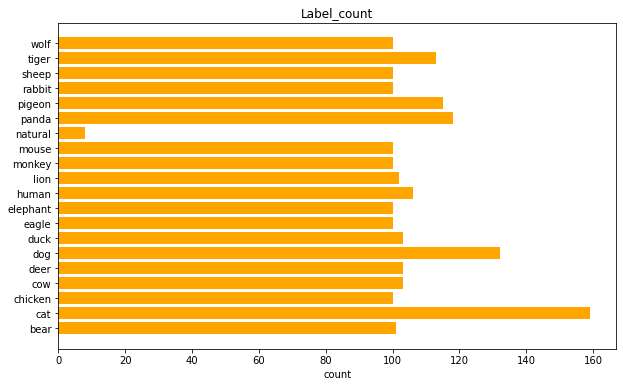

In [21]:
y_axis = list(count_values.keys())
values = count_values.values()
plt.figure(figsize=(10,6))
plt.barh(y_axis,values,color='#FFA500')
plt.xlabel('count')
plt.title('Label_count')

In [22]:
data['data'].shape

(2063, 80, 80, 3)

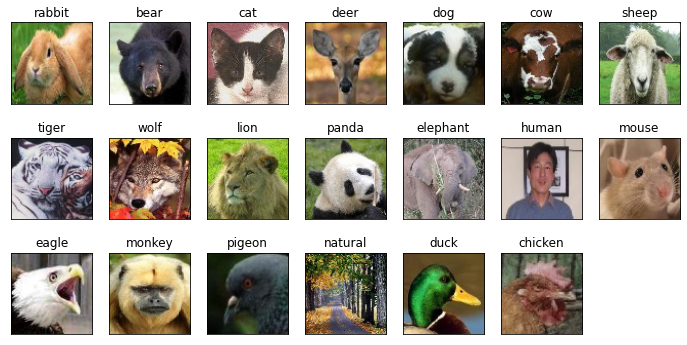

In [23]:
plt.figure(figsize=(12,6))
for i,c in enumerate(data['labels']):
    index = data['target'].index(c)
    img = data['data'][index]
    
    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(c)
plt.show()